# How to load and slice EFRI Data

## Imports



In [1]:
import h5py 
import mat73
import numpy as np
from matplotlib import pyplot as plt


## Data Paths

In [4]:
setup_path = '/run/user/1000/gvfs/smb-share:server=10.162.37.21,share=main/Public/EFRI/1_formatted/SUBJECT06/EFRI06_WAR_SES1_Setup.mat'
raw_path = '/run/user/1000/gvfs/smb-share:server=10.162.37.21,share=main/Public/EFRI/1_formatted/SUBJECT06/EFRI06_WAR_SES1_Raw.mat'

## Load raw data using h5py library to save memory

In [5]:
raw_file = h5py.File(raw_path)

In [6]:
Fs = raw_file['Fs'][0][0]

In [7]:
Fs

2000.0

In [6]:
lfp_data = raw_file['lfpdata']

In [7]:
lfp_data

<HDF5 dataset "lfpdata": shape (133, 3934000), type "<f8">

In [8]:
setup_data = mat73.loadmat(setup_path)

In [9]:
setup_data.keys()

dict_keys(['elec_area', 'elec_ind', 'elec_name', 'filters', 'trial_times', 'trial_words'])

In [11]:
setup_data['filters']['bets']

array([ 5.,  5.,  5.,  5., 20., 20.,  5.,  5.,  5., 20., 20., 20., 20.,
       20., 20.,  5.,  5., 20., 20.,  5.,  5.,  5.,  5., 20.,  5.,  5.,
        5.,  5., 20.,  5.,  5.,  5.,  5.,  5., 20., 20., 20.,  5., 20.,
        5., 20.,  5., 20.,  5.,  5.,  5., 20., 20., 20.,  5., 20.,  5.,
       20.,  5., 20.,  5.,  5., 20.,  5.,  5.,  5.,  5.,  5., 20.,  5.,
        5.,  5.,  5.,  5.,  5., 20., 20.,  5., 20., 20., 20.,  5.,  5.,
        5.,  5., 20., 20., 20., 20., 20.,  5., 20., 20.,  5.,  5.,  5.,
        5.,  5.,  5.,  5., nan, 20., 20.,  5., 20.,  5., 20., 20., 20.,
       20.,  5.,  5.,  5., 20.,  5.,  5.,  5., 20., 20., 20.,  5.,  5.,
       20., 20.,  5.,  5.,  5., 20.,  5., 20., 20., 20.,  5.,  5., 20.,
        5., 20.,  5., 20.,  5., 20.,  5.,  5.,  5., 20.,  5.,  5., 20.,
       20., 20.,  5., 20.,  5.,  5.,  5., 20.,  5.,  5., 20.,  5., 20.,
        5., 20.,  5.,  5.,  5.,  5., 20., 20.,  5.,  5.,  5.,  5., 20.,
       20.,  5.,  5.,  5.,  5.,  5., 20.,  5.,  5.,  5.,  5.,  5

In [10]:
setup_data['trial_times'][0][0]

array([129.8675, 130.455 , 131.2055, 133.222 , 134.325 , 135.0965,
       135.4885, 135.872 , 137.3385, 138.6555, 138.7075])

In [11]:
setup_data['trial_words'][0][0]

array([ 9., 30., 31., 32., 35., 33., 39., 51., 56., 53., 18.])

Trial word "35" corresponds to start move, our proxy for when they make their decision. For now we want to look at the 3 seconds before and 2 seconds after this point in each trial

Let's get the first channel from the lfp data, and get the chunk around start move for every trial

In [17]:
ch0 = lfp_data[0,:]

In [18]:
ch0.shape

(3934000,)

In [19]:
good_trials = setup_data['filters']['trial'][setup_data['filters']['success']].astype(int)-1

In [20]:
good_trials

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [21]:
setup_data['filters']['trial']

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [22]:
# That took a long time to load because we are loading the full duration of the channel recording into memory, maybe we should load just each chunk of interest

num_trials = len(good_trials)
data_array = np.zeros((num_trials,int(5*Fs)))
for i,t in enumerate(good_trials):
    start_move_time = setup_data['trial_times'][t][0][setup_data['trial_words'][t][0]==35][0]
    #print(f'start move time = {start_move_time} for trial {t}')
    
    ## To go from the time to the index position in the lfp array, multiply time by Fs 
    start_move_index = int(start_move_time*Fs)
    #print(f'start move index = {start_move_index} for trial {t}')
    start_index = int((start_move_time - 3.0)*Fs)
    end_index = start_index+int(5*Fs)#int((start_move_time + 2.0)*Fs)
    lfp_slice = lfp_data[0,start_index:end_index]
    data_array[i,:] = lfp_slice
    #break
    

In [23]:
t

185

In [24]:
data_array.shape

(185, 10000)

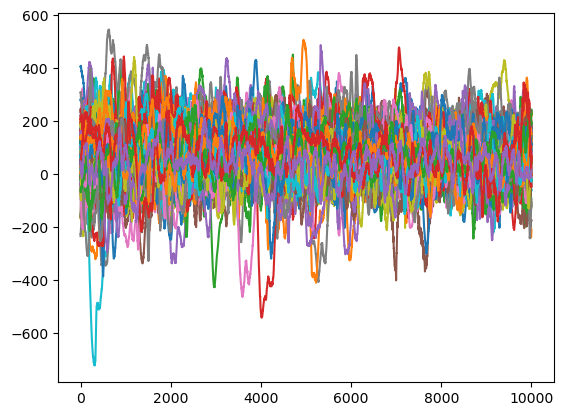

In [25]:

plt.plot(data_array.T)

In [26]:
setup_data['trial_times'][0][0][setup_data['trial_words'][0][0]==35]

array([134.325])

In [27]:
setup_data['trial_words'][0][0]==35

array([False, False, False, False,  True, False, False, False, False,
       False, False])